In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from blackbody import plancks_law, plancks_law_wl, spectral_flux_density
from data import bran_z, photometry_data, t_peak_mjd, bran_disc
from flux_utils import bands, flux_conversion

In [2]:
temp = 20000

nu_range = np.logspace(11, 20, 100)
l_range = np.linspace(0.0, 3.0, 100)[1:] * 10.**-6.

In [3]:
print(plancks_law(10**15, 10000))
from astropy import constants as const
from astropy import units as u

1.2244794080759375e-07 J / (m2 sr)


In [4]:
print((const.c/(1 * u.nm)).to("Hz"))
print(plancks_law_wl(0.6*10**-6, 5000))
print(const.c*plancks_law(u.s*const.c/(0.6*10**-6*u.m), 5000).to("kW m^-2 sr^-1 Hz^-1"))

2.9979245799999994e+17 Hz
12.762388541757584 kW / (m2 nm sr)
0.0045944598750327316 kW / (Hz m s sr)


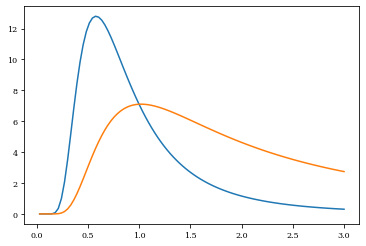

In [5]:
# for t in [10.**4.4, 10**4.6]:
plt.plot(l_range*10**6, plancks_law_wl(l_range, 5000))
plt.plot(l_range*10**6, const.c*plancks_law(u.s*const.c/(l_range*u.m), 5000))
# plt.xscale("log")
# plt.yscale("log")
# plt.ylim(bottom=10**-24)

9.034052344438133e-32 J / (m2 sr)


/usr/local/anaconda3/envs/bran_stark_paper/lib/python3.8/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in exp
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(6725161981496.805, 1.345032396299361e+16)

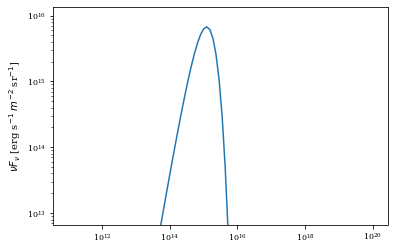

In [6]:
y = np.array([x.value for x in plancks_law(nu_range, 15000)]) *nu_range * u.joule.to("erg")
print(plancks_law(10.*14, 15000))
plt.plot(nu_range, y)
plt.yscale("log")
plt.ylabel(r"$\nu F_{\nu}$ [erg s$^{-1}$ $m^{-2}$ sr$^{-1}$]")
plt.xscale("log")
plt.ylim(0.001*max(y), 2*max(y))

9.034052344438133e-32 J / (m2 sr)


/usr/local/anaconda3/envs/bran_stark_paper/lib/python3.8/site-packages/astropy/units/quantity.py:481: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(3.169630607925985e-15, 6.33926121585197e-12)

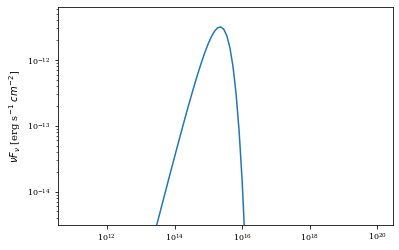

In [7]:
y = np.array([x.value for x in spectral_flux_density(nu_range, 10**4.6, z=bran_z, r_bb_cm = 6 * 10**16.)])
print(plancks_law(10.*14, 15000))
plt.plot(nu_range, y)
plt.yscale("log")
plt.ylabel(r"$\nu F_{\nu}$ [erg s$^{-1}$ $cm^{-2}$]")
plt.xscale("log")
plt.ylim(0.001*max(y), 2*max(y))

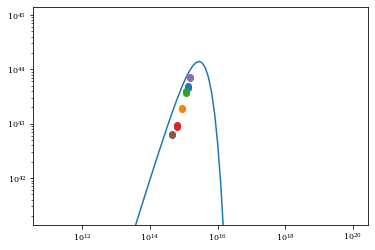

In [8]:
t_offset = bran_disc.mjd - t_peak_mjd.mjd

lower = 50
upper = 55


mask = np.logical_and(
    photometry_data["#day_since_peak"] - t_offset > lower,
    photometry_data["#day_since_peak"] - t_offset < upper,
)

plt.figure()
ax = plt.subplot(111)
    
data = photometry_data[mask]

fs = []
lums = []

for band in list(set(data["band"][mask])):
    if band in bands:
        wl = bands[band].to("m")
        f = (const.c / wl).to("Hz")

        bmask = np.logical_and(
            data["band"] == band,
            data["lum"] > 0.
        )

        bd = data[bmask]["lum"]
#             err = data[data["band"] == band]["lum"]
#             bd = np.array(list(bd[bd > 0]))

        x = np.ones_like(bd) * f.value
        if len(bd) > 0:
            ax.scatter(
                x,
                bd
            ) 
            
            
y = np.array([x.value for x in spectral_flux_density(nu_range, 10**4.7, z=bran_z, r_bb_cm = 2. * 10**17.)]) / flux_conversion
plt.plot(nu_range, y)
plt.ylim(0.001*max(y), 10.*max(y))
plt.yscale("log")
plt.xscale("log")